In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd /gdrive

Mounted at /content/drive
/gdrive


In [0]:
import pandas as pd 
import os
import numpy as np
import string
import matplotlib.pyplot as plt
import datetime
import matplotlib.style as style
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree.export import export_text
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
!pip install -q pydot
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 

In [0]:
import numpy as np
from numpy import log2 as log

In [0]:
cd /gdrive/My Drive/EUNSUK

[Errno 107] Transport endpoint is not connected: '/gdrive/My Drive/EUNSUK'
/gdrive


In [0]:
data=pd.read_csv('/content/sample.csv',delimiter=',')

In [0]:
target=data['MV101']

In [0]:
def divdata(data):
  keys=(data.unique())
  values=(data.value_counts())
  dicts={}
  for i in keys:
        dicts[i] = values[i]
  return dicts

In [90]:
print(divdata(target))

{1: 15, 0: 15}


In [0]:
def init_entropy(data):
  dic=divdata(data)
  tsum=sum(dic.values())
  ratio=0
  for key ,value in dic.items():
    p=value/tsum
    ratio-=(p*log(p))
  return ratio

In [0]:
def entropy(data):
  dic=divdata(data)
  tsum=sum(dic.values())
  ratio=0
  for key ,value in dic.items():
    p=value/tsum
    ratio-=(p*log(p))
  return ratio

In [0]:
def crossentropy(label,target):
  dic=divdata(target)
  tsum=sum(dic.values())
  ratio=0
  for key ,value in dic.items():
    p=value/tsum
    ratio-=(p*log(p))
  return ratio

In [0]:
def divdataset(label):
  
  dic1=divdata(label)
  u_label_val=label.unique()
  df=[]
  target='usage'
  for val in u_label_val:
    split_df=data[label==val]
  

  print(entropy(split_df['usage']))


In [95]:
print(init_entropy((target)))

1.0


In [0]:
def centropy(label_col_name,dataframe,target_col_name):

  data=dataframe
  label=data[label_col_name]
  
  dicts=divdata(label)
  u_label_val=label.unique()
  total_value=sum(dicts.values())
  centropy=0
  for key, val in dicts.items():
    
    split_df=data[label==key]
    pr=val/total_value
    p=entropy(split_df[target_col_name])
    centropy-=-pr*p

  return centropy

In [97]:
target='MV101'
for cols in data.columns:
  if cols != target:
    print(cols,": ",centropy(cols,data,target))
  

P101 :  0.9709505944546686
N101 :  0.9138994896505931


In [0]:
# datac=pd.read_csv('/content/drive/My Drive/EUNSUK/train_modified.csv',delimiter=',')

In [99]:
datal=data[['P101', 'N101']]
target='MV101'
ientropy=init_entropy(data[target])
for cols in datal:
  
  print(cols,": ",centropy(cols,data,target))
  print(cols,"  Info_gain: ",ientropy-centropy(cols,data,target))


P101 :  0.9709505944546686
P101   Info_gain:  0.02904940554533142
N101 :  0.9138994896505931
N101   Info_gain:  0.08610051034940691


a. MV-304 OPEN

b. UF Pump (P-301/ P-302) START for 30 Seconds

c. MV-302 OPEN

d. MV-304 CLOSE

e. UF Filtration In Place


In [0]:
#FUNCTION: DECISION TREE 
def generate_rtree(feature, output, depth,feature_cols):
      # Split data 70% training and 30% test
      X_train, X_test, y_train, y_test = train_test_split(feature,output, test_size=0.3, random_state=1) 

      target_value=(str(output.columns.values[0]))
      decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=depth)
      clf = decision_tree.fit(X_train,y_train)
      #tree.plot_tree(clf)
      
      d_tr = export_text(clf, feature_names=feature_cols)
      
      print(target_value)
      print(d_tr)
      return clf

In [0]:
def generate_vtree(X_feature,y_out,depth,classes,feature_cols):
      from sklearn.datasets import load_iris
      from sklearn import tree
      #iris = load_iris()
      clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=depth)
      clf = clf.fit(X_feature,y_out)
      import graphviz 
      dot_data = tree.export_graphviz(clf, out_file=None) 
      graph = graphviz.Source(dot_data) 
      graph.render("iris") 
      dot_data = tree.export_graphviz(clf, out_file=None, 
                           feature_names=feature_cols,  
                           class_names=classes,  
                           filled=True, rounded=True,  
                           special_characters=True)  
      graph = graphviz.Source(dot_data)  
      graph 
      

In [0]:
feature_cols_p101 = ['P101', 'N101']

X_data = data[feature_cols_p101] # Features
target=['MV101']
y_data = data[target] # Target variable
classes=["on","off"]


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.15,shuffle=False, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25, 2) (5, 2) (25, 1) (5, 1)


In [104]:
clf=generate_rtree(X_train,y_train,3,feature_cols_p101)
print("\n","FEATURE IMPORTANCE","\n")
print(clf.feature_importances_)

MV101
|--- N101 <= 0.50
|   |--- P101 <= 0.50
|   |   |--- class: 0
|   |--- P101 >  0.50
|   |   |--- class: 0
|--- N101 >  0.50
|   |--- P101 <= 0.50
|   |   |--- class: 1
|   |--- P101 >  0.50
|   |   |--- class: 1


 FEATURE IMPORTANCE 

[0.2368086 0.7631914]


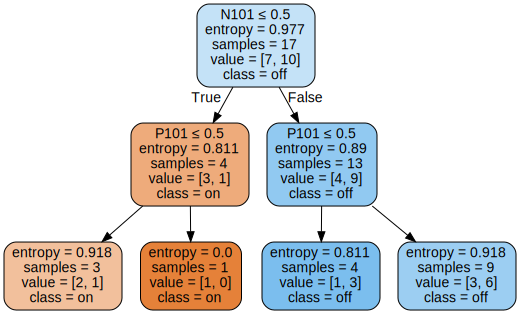

In [105]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols_p101,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [0]:
datas=datac[['MV301','MV302','MV303', 'MV304']]

In [0]:
def plot_graphs_discrete(num_plot,labels, data, fig_size=(15,15)):
  fig, ax = plt.subplots(num_plot,figsize= fig_size)

  for num, label in zip(range(num_plot),labels):
    color = 'tab:blue'
    ax[num].set_xlabel('time (s)')
    ax[num].set_ylabel(label, color=color)
    ax[num].plot(xpoints[:],data[label][:], color=color)
    ax[num].tick_params(axis='y', labelcolor=color)
  plt.show()

In [0]:
def plot_graphs_superimpose(labels, data , fig_size=(15,15)):
  num_plot=len(labels)
  colors = plt.cm.jet(np.linspace(0,1,num_plot))
  from matplotlib.pyplot import figure
  figure(num=None, figsize=fig_size, facecolor='w', edgecolor='k')
  for num, label in zip(range(len(labels)),labels):
    plt.plot(xpoints[:],data[label][:], color=colors[num])
  plt.show()

In [0]:
def plot_analog_bool(label, data , fig_size):
  fig, ax1 = plt.subplots(figsize=fig_size)
  t=[i for i in range(len(label[0]))]
  xpoints = [i for i in range(len(data[label]))]

  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel(label[0], color=color)
  ax1.plot( xpoints[:],data[label[0]][:], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel(label[1], color=color)  # we already handled the x-label with ax1
  ax2.plot(xpoints[:],data[label[1]][:], color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

In [0]:
def plot_analog_bool_bool(labels, data , fig_size):
  fig, ax1 = plt.subplots(figsize=fig_size)
  t=[i for i in range(len(labels[0]))]
  xpoints = [i for i in range(len(data[labels]))]

  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel(labels[0], color=color)
  ax1.plot( xpoints[:],data[labels[0]][:], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel(labels[1], color=color)  # we already handled the x-labels with ax1
  ax2.plot(xpoints[:],data[labels[1]][:], color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax3 = ax2.twinx()

  color = 'tab:green'
  ax3.set_ylabel(labels[2], color=color)  # we already handled the x-labels with ax1
  ax3.plot(xpoints[:],data[labels[2]][:], color=color)
  ax3.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

In [0]:
def normal_plot(x,data, fig_size):
  from matplotlib.pyplot import figure
  figure(num=None, figsize=fig_size, facecolor='w', edgecolor='k')
  new_xpoints=[i for i in range(len(data[x]))]
  plt.plot(new_xpoints,data[x])
  plt.xlabel(x) 

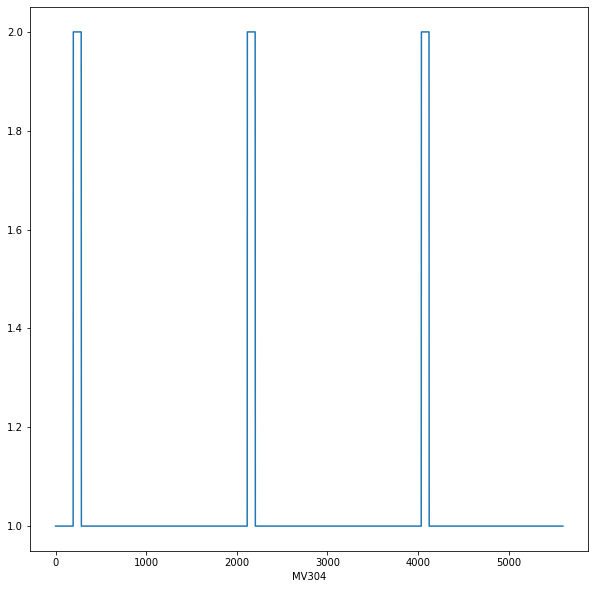

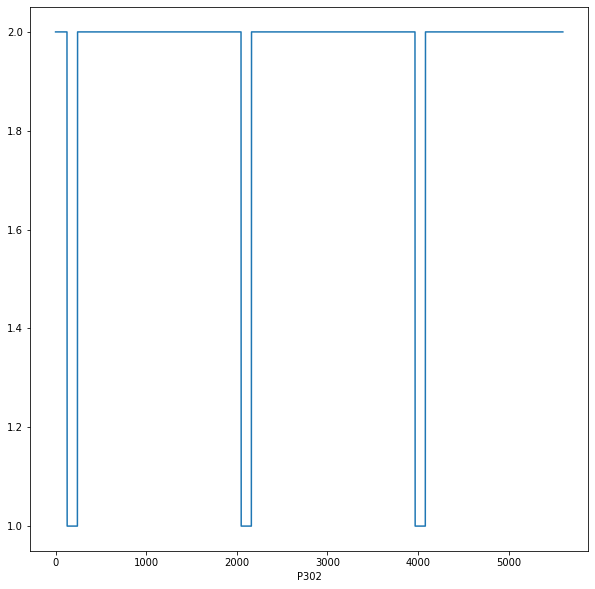

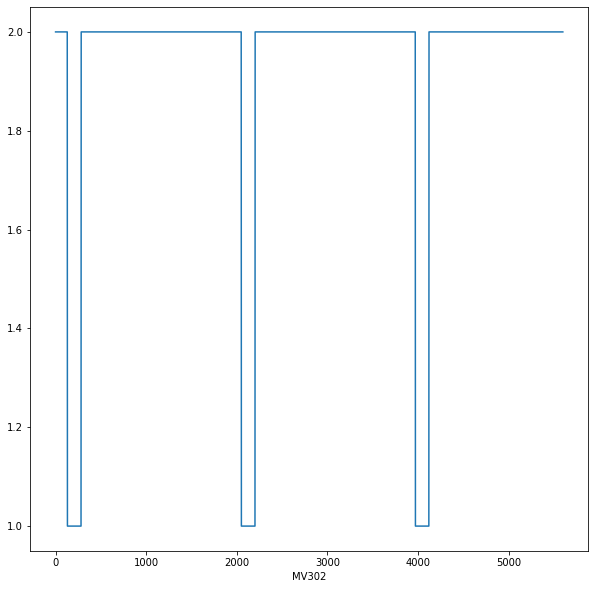

In [0]:
cols=['MV304','P302','MV302']
for col in cols:
  
  normal_plot(col,datac[10400:16000],(10,10))
  

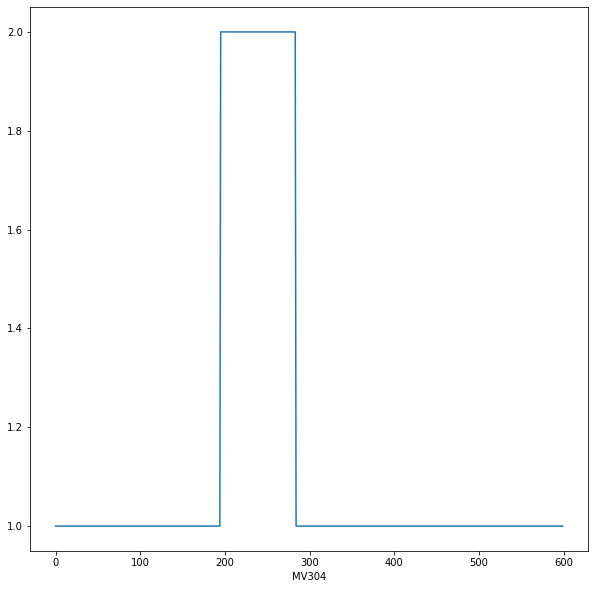

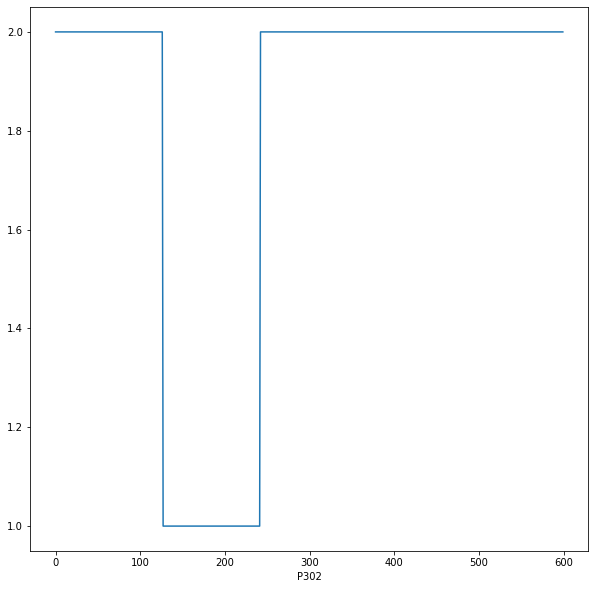

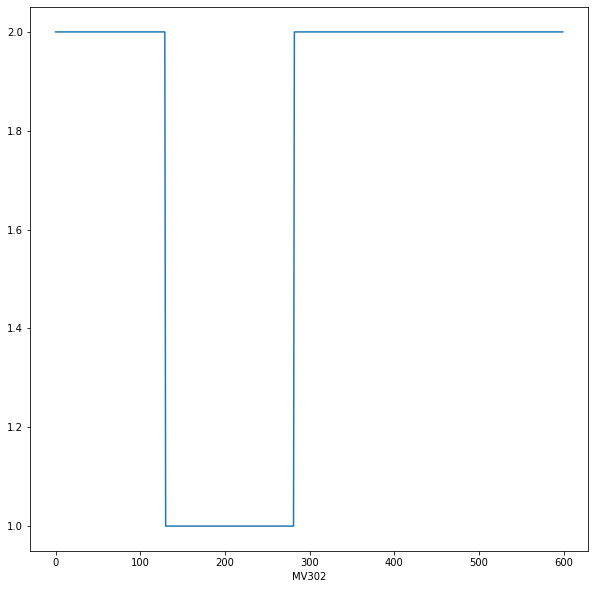

In [0]:
cols=['MV304','P302','MV302']
for col in cols:
  
  normal_plot(col,datac[10400:11000],(10,10))

In [0]:
def plot_graphs_discrete(num_plot,labels, data, fig_size=(15,15)):
  fig, ax = plt.subplots(num_plot,figsize= fig_size)

  for num, label in zip(range(num_plot),labels):
    color = 'tab:blue'
    ax[num].set_xlabel('time (s)')
    ax[num].set_ylabel(label, color=color)
    ax[num].plot(xpoints[:],data[label][:], color=color)
    ax[num].tick_params(axis='y', labelcolor=color)
  plt.show()

In [0]:
def plot_graphs_superimpose(labels, data , fig_size=(15,15)):
  num_plot=len(labels)
  colors = plt.cm.jet(np.linspace(0,1,num_plot))
  from matplotlib.pyplot import figure
  figure(num=None, figsize=fig_size, facecolor='w', edgecolor='k')
  
  for num, label in zip(range(len(labels)),labels):
    xpoints=[x for x in range(len(data[label]))]
    plt.step(xpoints[:],data[label][:], color=colors[num])
  plt.show()

In [0]:
def plot_analog_bool(label, data , fig_size):
  fig, ax1 = plt.subplots(figsize=fig_size)
  t=[i for i in range(len(label[0]))]
  xpoints = [i for i in range(len(data[label]))]

  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel(label[0], color=color)
  ax1.plot( xpoints[:],data[label[0]][:], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel(label[1], color=color)  # we already handled the x-label with ax1
  ax2.plot(xpoints[:],data[label[1]][:], color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

In [0]:
def plot_analog_bool_bool(labels, data , fig_size):
  fig, ax1 = plt.subplots(figsize=fig_size)
  t=[i for i in range(len(labels[0]))]
  xpoints = [i for i in range(len(data[labels]))]

  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel(labels[0], color=color)
  ax1.plot( xpoints[:],data[labels[0]][:], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel(labels[1], color=color)  # we already handled the x-labels with ax1
  ax2.plot(xpoints[:],data[labels[1]][:], color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax3 = ax2.twinx()

  color = 'tab:green'
  ax3.set_ylabel(labels[2], color=color)  # we already handled the x-labels with ax1
  ax3.plot(xpoints[:],data[labels[2]][:], color=color)
  ax3.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

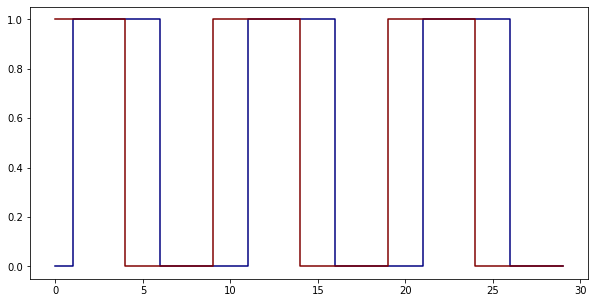

In [127]:
plot_graphs_superimpose(['P101','MV101'],data,(10,5))

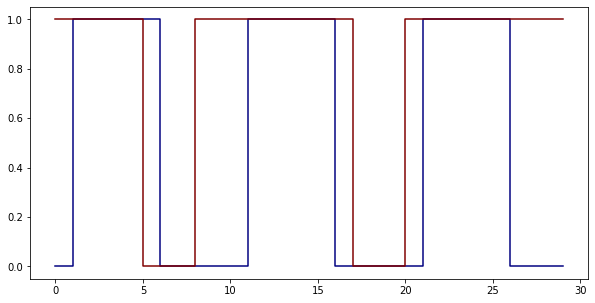

In [129]:
plot_graphs_superimpose(['P101','N101'],data,(10,5))